# K-Means

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


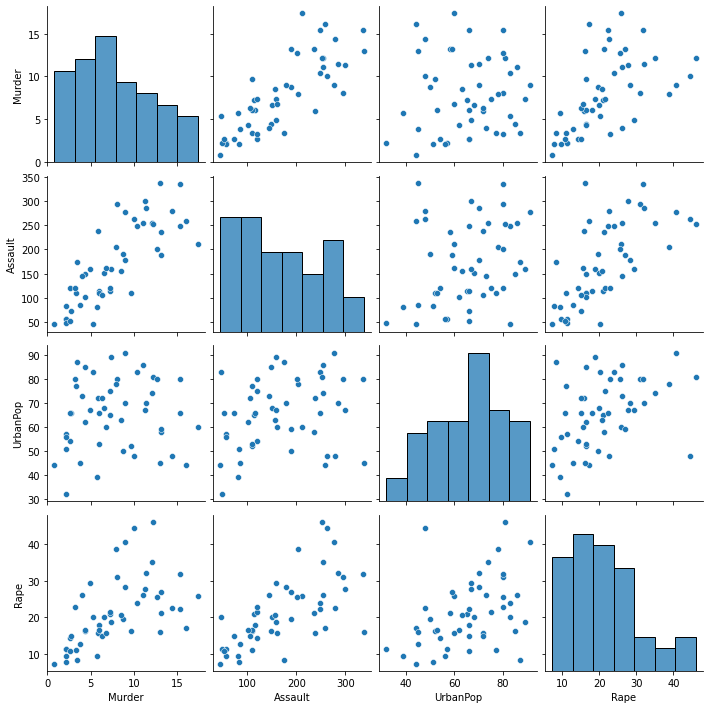

In [7]:
sns.pairplot(df)
plt.show();

**Hopkins Test**
* Zaman ve maliyet verimliliği için, İlk olarak Veride kümeleme eğilimi var mi yok mu belirlemek için ``Hopkins Testi`` yapılır.
* Null Hypothesis(Ho) ve Alternative Hypothesis(Ha) temeline dayaniyor.
* Null Hypothesis(Ho): Uniform dagilim var, anlamli kümeleme yok.
* Alternative Hypothesis(Ha):  Veri, ratsgele veri noktalarindan oluşur. Yani Kumeleme vardir.
* [0,1] araliginda bir score verir. score, 0’a yaklaştıkça veri uniform degil,yani clusteringe meyilli
* 1’e yaklaştıkça uniform yapi var, 0.5 gecmedikce kümelenebilir olarak ifade edilir. pratikte 0.3 sinir alinir.

In [8]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [9]:
hopkins(df,df.shape[0])

0.4182493723283697

In [10]:
hopkins(scale(df),df.shape[0]) #standart scaler alternatifidir.

0.3907846264778274

# K_Means Model
> ilk olarak k=2 icin deneme yapalim

In [11]:
k_means = KMeans(n_clusters = 2).fit(df)
clusters = k_means.labels_
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

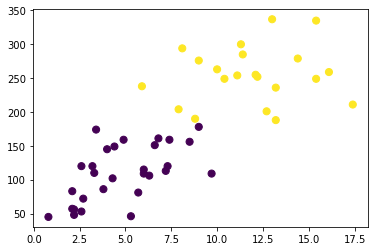

In [12]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [13]:
centroids = k_means.cluster_centers_
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

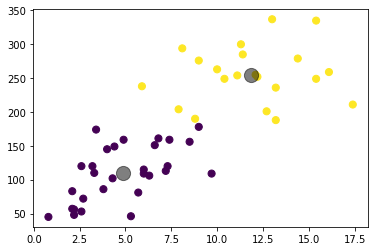

In [14]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

# **Elbow Method**
* aciklanan varyans(Sum of squared distances) ve küme sayisi(k) arasindaki ilişkiye dayanarak cozum geliştiren bir yöntem, 
* yani aciklanan varyans, küme sayisinin fonksiyonu olarak çizilir, grafikte dirseğin kirildigi nokta, k nin optimal degeridir
* minimum k ile minimum hatanin alindigi optimum noktayi baz alacagiz. Keskin dususun en son bittigi yeri alacagiz. 

In [15]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)
    

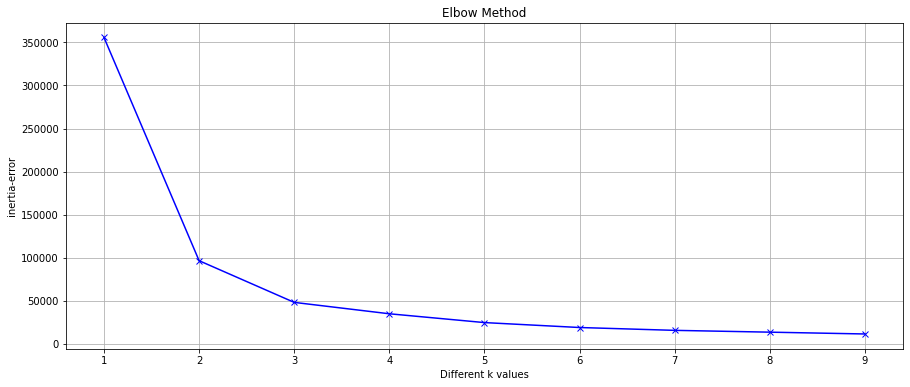

In [16]:
plt.figure(figsize=(15,6))
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

**Elbow Method with yellowbrick**

In [17]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'sklearn.pipeline'

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(df)
visu.poof();

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(df)
labels = kmeans.labels_

In [ ]:
df["Cluster_Id"] = labels
df.sample(10)

# S(Silhouette) Score
* her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.
* S değeri ile ifade edilir, s, 1’e yakinsa high clustering, -1e yakinsa low clustering / no clustering olarak yorumlanir.


In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(df, labels)}')

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids');

# ARI (Adjusted Rand Intex) Score
* Rand Index(RI), tahmin edilen kümelerle gerçek kümeler üzerinde ayni veya farkli kümelere atanan tum ornek çiftlerini dikkate alarak iki küme arasindaki benzerlik olcusunu hesaplıyor. İki kümenin ortusme basarisini verir. 
* 1’e yakinsa iyi bir kümeleme oldu, 0’a yakinsa basarisiz kümeleme oldu denir.



In [ ]:
new_df = df.sample(20, random_state=42)
new_df

In [ ]:
new_df["true_label"] = ['A','B','B','C','B','A','A','A','B','C','B','B','A','B','C','A','C','C','A','C']
new_df

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
adjusted_rand_score(new_df["true_label"],new_df["Cluster_Id"])

In [ ]:
pd.crosstab(new_df.Cluster_Id,new_df.true_label)

# Hierarchy Clustering

In [ ]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# from sklearn.cluster import AgglomerativeClustering

* linkage: Yakinlik hesaplama yontemi
* Default linkage metodu 'single' dir, ama sektorde 'complete' ve 'ward' kullanilir. 

In [ ]:
hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
hc_single = linkage(df, "single")

**complete**

In [ ]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

**ward**

In [ ]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

* Yukaridaki 2 dendograma gore k=2 alinmali. Ancak bu sekil fikir vermeli, domain bilgisi de kullanarak k sayisina karar vermeli.
* Sezgisel olarak 3 olmasi gerektigi soylenebilir.

**single**
* sektorde kullanilmayan bir hesaplama metodudur.

In [ ]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward') # burada default linkage='ward' dur.
hc.fit_predict(df)

In [ ]:
hc.labels_

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=hc.labels_,cmap="rainbow");

# S(Silhouette) Score
* her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.
* S değeri ile ifade edilir, s, 1’e yakinsa high clustering, -1e yakinsa low clustering eğilimi gosterir.

In [ ]:
# from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
print(f'Silhouette Score(n=3): {silhouette_score(df, hc.labels_)}')

**Visualization of Clusters in 3D**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=3).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

In [ ]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

**Visualization of Clusters in Maps**

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
df=df.reset_index().rename(columns={'index':'State'})
df['State_Short']=df['State'].replace(us_state_abbrev)
df.head()

In [ ]:
df['Cluster_Id']=df['Cluster_Id'].astype('str')

In [19]:
import plotly.express as px  

fig = px.choropleth(df,  
                    locations='State_Short', 
                    color="Cluster_Id", 
                    hover_name="State", 
                    locationmode = 'USA-states') 
fig.update_layout(
    title_text = 'US States Crime Arrest Grouping', 
    geo_scope='usa',
)
fig.show()

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['Murder', 'Assault', 'UrbanPop', 'Rape'] but received: State